In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
import warnings
import os
import glob
import pandas as pd
from google.colab import drive

warnings.filterwarnings("ignore")

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path dataset di Google Drive
dataset_path = '/content/drive/MyDrive/Colab Notebooks/dataset_bunga/flowers'

In [ ]:
# Cek kategori bunga
categories = os.listdir(dataset_path)
print("Kategori bunga:", categories)

Kategori bunga: ['tulip', 'calendula', 'california_poppy', 'sunflower', 'magnolia', 'rose', 'bellflower', 'daffodil', 'iris']


In [ ]:
# Fungsi untuk membuat DataFrame dari path gambar (dari notebookmu)
def create_image_dataframe(dataset_dir):
    data = []
    image_extensions = ['*.png', '*.jpg', '*.jpeg']
    image_paths = []
    for ext in image_extensions:
        image_paths.extend(glob.glob(os.path.join(dataset_dir, '**', ext), recursive=True))

    for path in image_paths:
        label = os.path.basename(os.path.dirname(path))
        data.append((label, path))

    df = pd.DataFrame(data, columns=['label', 'path'])
    return df

In [ ]:
# Buat DataFrame
df = create_image_dataframe(dataset_path)
print("DataFrame head:")
print(df.head())

DataFrame head:
   label                                               path
0  tulip  /content/drive/MyDrive/Colab Notebooks/dataset...
1  tulip  /content/drive/MyDrive/Colab Notebooks/dataset...
2  tulip  /content/drive/MyDrive/Colab Notebooks/dataset...
3  tulip  /content/drive/MyDrive/Colab Notebooks/dataset...
4  tulip  /content/drive/MyDrive/Colab Notebooks/dataset...


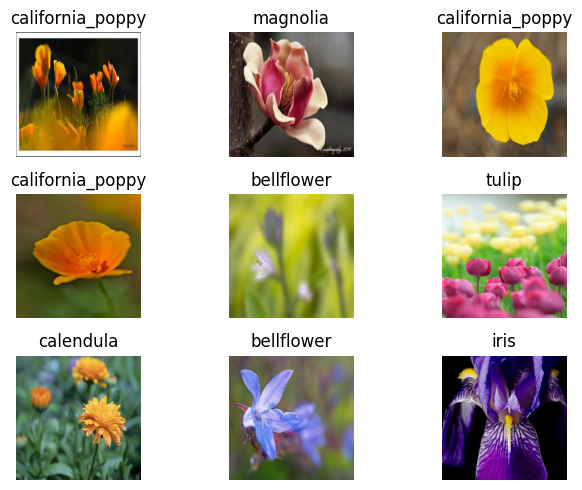

In [ ]:
num_images=9
# Randomly sample num_images from the DataFrame
sampled_df = df.sample(n=num_images).reset_index(drop=True)

plt.figure(figsize=(7, 5))

for i in range(num_images):
    plt.subplot(3, 3, i + 1)

    # Read the image
    img_path = sampled_df.iloc[i]['path']
    img = plt.imread(img_path)

    plt.imshow(img)
    plt.title(sampled_df.iloc[i]['label'])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
counts=df['label'].value_counts()
counts

,count
label,
magnolia,252
california_poppy,202
sunflower,151
iris,141
calendula,114
rose,112
tulip,101
bellflower,94
daffodil,92


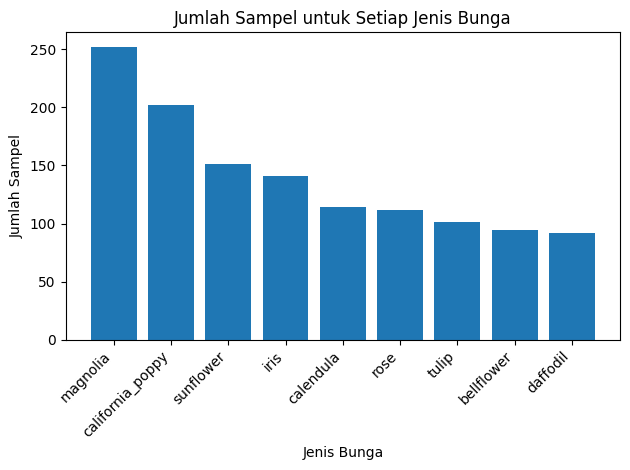

In [ ]:
# Menghitung jumlah setiap kategori bunga
counts = df['label'].value_counts()

# Membuat plot batang
plt.bar(counts.index, counts, width=0.8)

plt.xlabel('Jenis Bunga')
plt.ylabel('Jumlah Sampel')
plt.title("Jumlah Sampel untuk Setiap Jenis Bunga")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
selected_labels=['daffodil', 'iris', 'rose', 'tulip']
import pandas as pd

def select_and_sample_classes(df, selected_labels, num_samples=700):

    # Filter the DataFrame for selected labels
    filtered_df = df[df['label'].isin(selected_labels)]

    sampled_df = pd.DataFrame()
    for label in selected_labels:
        label_df = filtered_df[filtered_df['label'] == label].sample(n=num_samples, replace=True)
        sampled_df = pd.concat([sampled_df, label_df], ignore_index=True)

    return sampled_df

sampled_df = select_and_sample_classes(df, selected_labels, num_samples=700)
sampled_df['label'].value_counts()

,count
label,
daffodil,700
iris,700
rose,700
tulip,700


In [ ]:
# Splitting data into training (70%), testing (15%), and validation (15%) sets
train_df, temp_df = train_test_split(sampled_df, test_size=0.3, random_state=42)
test_df, valid_df = train_test_split(temp_df, test_size=0.5, random_state=42)
print("Training set shapes:", train_df.shape)
print("Testing set shapes:", test_df.shape)
print("Validation set shapes:", valid_df.shape)

Training set shapes: (1960, 2)
Testing set shapes: (420, 2)
Validation set shapes: (420, 2)


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
#     shear_range=0.2,
#     rotation_range=.1,
#     zoom_range=0.2,
#     horizontal_flip=True ,
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Training data generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

# Validation data generator
valid_generator = test_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='path',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

# Testing data generator
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='path',
    y_col='label',
    target_size=(128, 128),
    color_mode='rgb',
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

Found 1960 validated image filenames belonging to 4 classes.
Found 420 validated image filenames belonging to 4 classes.
Found 420 validated image filenames belonging to 4 classes.


In [ ]:
classes=list(train_generator.class_indices)
classes

['daffodil', 'iris', 'rose', 'tulip']

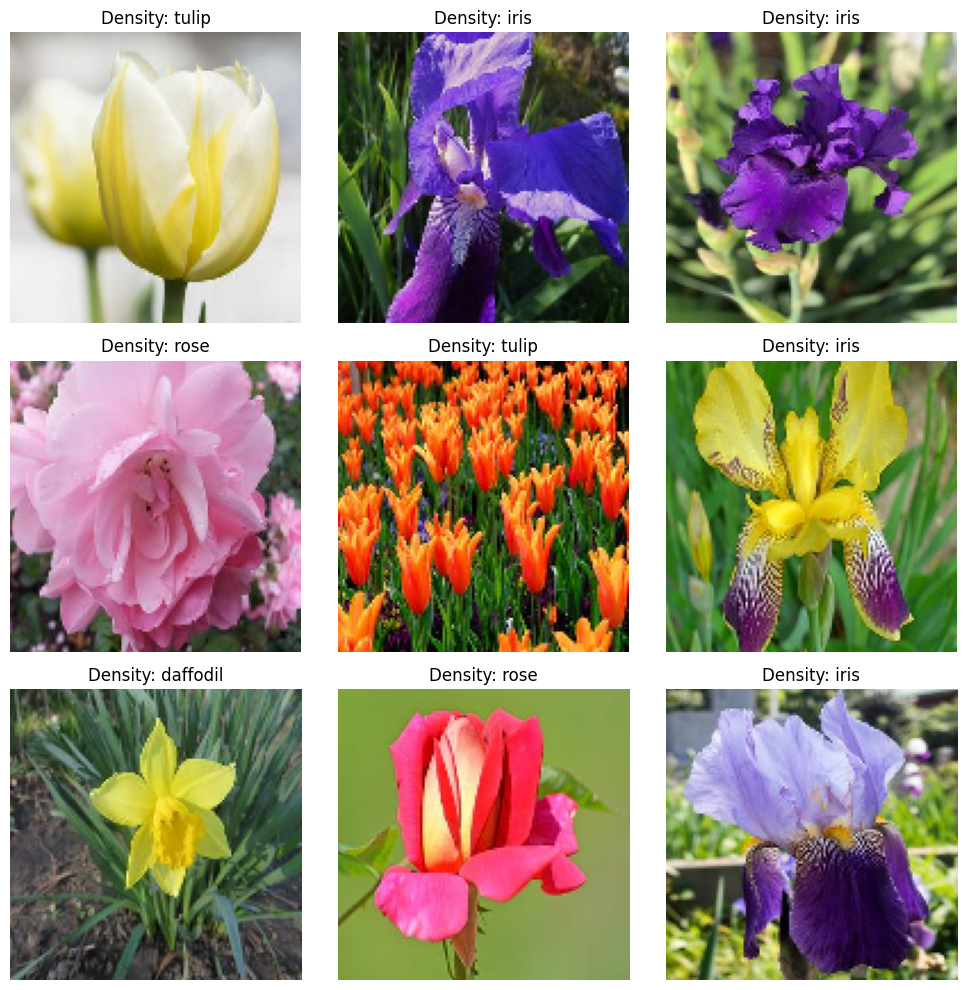

In [ ]:
batch_size = 9
# Generate a batch of images and labels
images, labels = next(train_generator)
# Plot the images with their labels
plt.figure(figsize=(10, 10))
for i in range(min(len(images), 9)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    label = np.argmax(labels[i])
    plt.title(f"Density: {classes[label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Ambil satu batch data untuk contoh (ganti dengan cara muat data sesuai kebutuhan)
x_train, y_train = next(train_generator)
x_valid, y_valid = next(valid_generator)
x_test, y_test = next(test_generator)

# Cetak ukuran dataset dengan perbaikan typo
print(f'x_train shape :         {x_train.shape}')
print(f'y_train shape :         {y_train.shape}\n')

print(f'x_validation shape :    {x_valid.shape}')
print(f'y_validation shape :    {y_valid.shape}\n')

print(f'x_test shape :          {x_test.shape}')
print(f'y_test shape :          {y_test.shape}')

x_train shape :         (32, 128, 128, 3)
y_train shape :         (32, 4)

x_validation shape :    (32, 128, 128, 3)
y_validation shape :    (32, 4)

x_test shape :          (64, 128, 128, 3)
y_test shape :          (64, 4)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

# Definisikan ukuran gambar dan channel
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_CHANNELS = 3

model = keras.models.Sequential()

model.add(Conv2D(64,(3,3),input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Jumlah output disesuaikan dengan jumlah kelas bunga yang dipilih (4 kelas)
model.add(Dense(len(classes), activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    29,491,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,534,788 (112.67 MB)

 Trainable params: 29,533,636 (112.66 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [ ]:
weight_path = "cnn_weights.best.weights.h5"

checkpoint = ModelCheckpoint(weight_path, monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max', save_weights_only=True)

early = EarlyStopping(monitor="val_accuracy",
                      mode="max",
                      patience=4)

callbacks_list = [checkpoint, early]

In [ ]:
epoch_num=20
history=model.fit(train_generator,epochs=epoch_num,validation_data=(valid_generator),callbacks=callbacks_list)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6917 - loss: 0.9581
Epoch 1: val_accuracy improved from -inf to 0.42857, saving model to cnn_weights.best.weights.h5
62/62 ━━━━━━━━━━━━━━━━━━━━ 233s 4s/step - accuracy: 0.6932 - loss: 0.9530 - val_accuracy: 0.4286 - val_loss: 1.1039
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9196 - loss: 0.2316
Epoch 2: val_accuracy did not improve from 0.42857
62/62 ━━━━━━━━━━━━━━━━━━━━ 175s 3s/step - accuracy: 0.9198 - loss: 0.2312 - val_accuracy: 0.3000 - val_loss: 1.4505
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9798 - loss: 0.0877
Epoch 3: val_accuracy improved from 0.42857 to 0.56667, saving model to cnn_weights.best.weights.h5
62/62 ━━━━━━━━━━━━━━━━━━━━ 184s 3s/step - accuracy: 0.9798 - loss: 0.0877 - val_accuracy: 0.5667 - val_loss: 0.9880
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9913 - loss: 0.0405
Epoch 4: val_accuracy did not improve from 0.56667
62/62 ━━━━━━━━━━━━━━━

In [ ]:
# load the best weights
model.load_weights(weight_path)

In [ ]:
# Evaluate the model on the test data
evaluation_result = model.evaluate(test_generator)

# The result
print("Test Loss:", evaluation_result[0])
print("Test Accuracy:", evaluation_result[1])

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 800ms/step - accuracy: 1.0000 - loss: 0.0061
Test Loss: 0.006215752102434635
Test Accuracy: 1.0


In [ ]:
#  predictions on test data
y_pred = model.predict(test_generator)

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 844ms/step


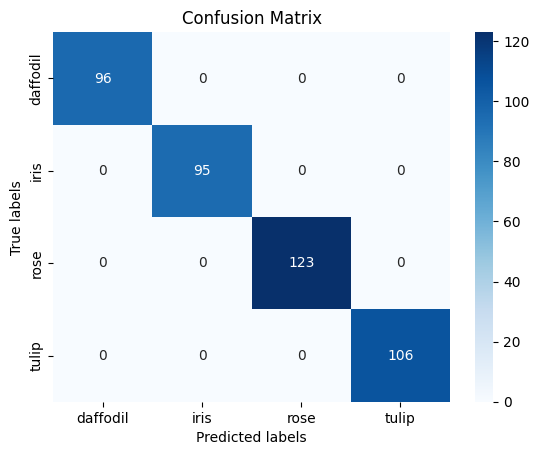

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prediksi kelas
y_pred_classes = np.argmax(y_pred, axis=1)

# Label asli dari test set
y_test_classes = test_generator.classes

# Confusion matrix
confusion_Matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Daftar label kelas
class_labels = ['daffodil', 'iris', 'rose', 'tulip']

# Plot heatmap confusion matrix
sns.heatmap(confusion_Matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


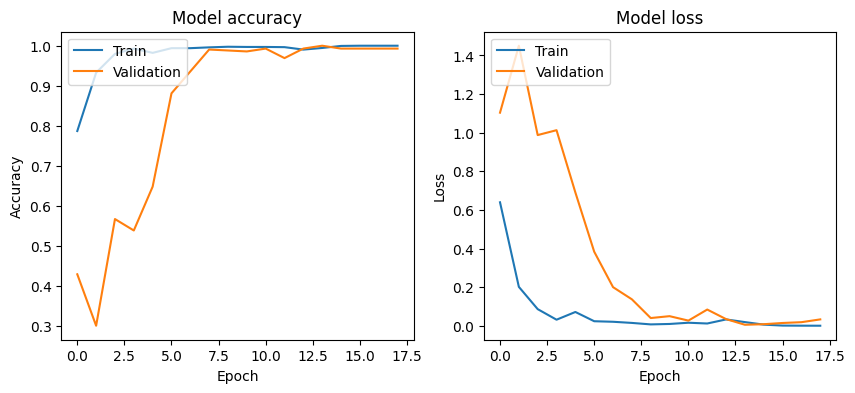

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# Plot the training and validation accuracy
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')

# Plot the training and validation loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')

# Display the plots
plt.show()

In [ ]:
from sklearn.metrics import classification_report

classes = ['daffodil', 'iris', 'rose', 'tulip']
print(classification_report(y_test_classes, y_pred_classes, target_names=classes))

              precision    recall  f1-score   support

    daffodil       1.00      1.00      1.00        96
        iris       1.00      1.00      1.00        95
        rose       1.00      1.00      1.00       123
       tulip       1.00      1.00      1.00       106

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


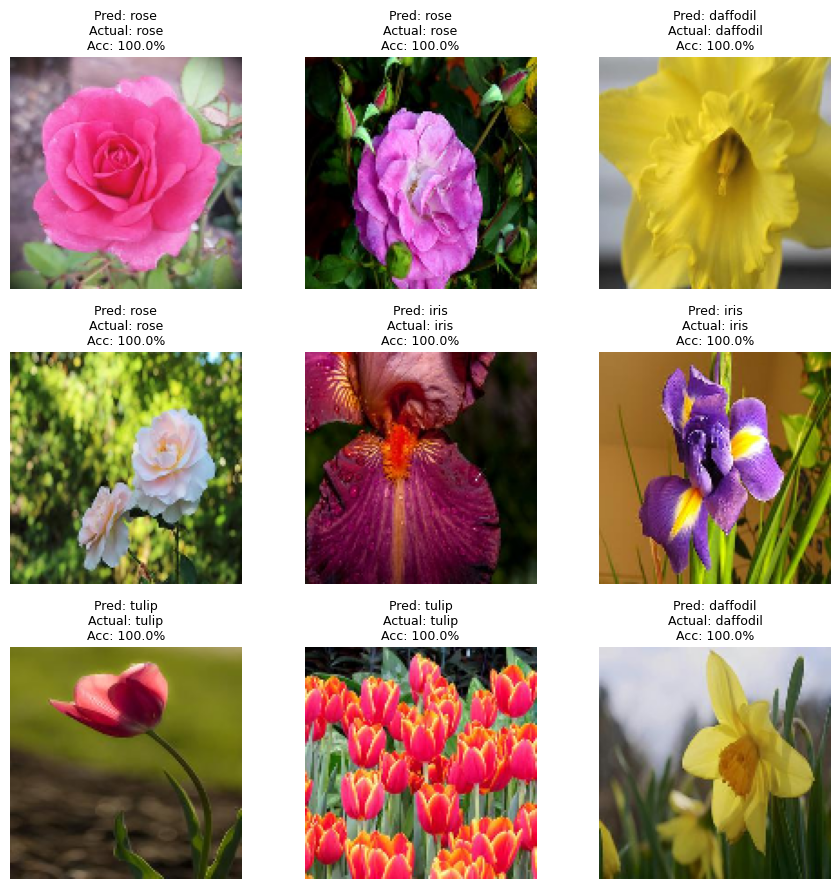

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Daftar nama kelas
classes = ['daffodil', 'iris', 'rose', 'tulip']

# Hitung akurasi per kelas berdasarkan seluruh data uji
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = test_generator.classes

# Ambil laporan klasifikasi
report_dict = classification_report(
    y_test_classes,
    y_pred_classes,
    target_names=classes,
    output_dict=True
)

# Simpan akurasi recall (yang paling umum untuk klasifikasi) per kelas dalam persentase
class_accuracy = {label: round(report_dict[label]['recall'] * 100, 2) for label in classes}

# Ambil batch data dari generator
x_test, y_test = next(test_generator)

# Buat figure
fig, axs = plt.subplots(3, 3, figsize=(9, 9))
axs = axs.flatten()

for i in range(9):
    # Prediksi gambar
    predicted = model.predict(np.array([x_test[i]]))
    predictedClass = np.argmax(predicted)
    actual = np.argmax(y_test[i])

    pred_label = classes[predictedClass]
    actual_label = classes[actual]
    acc = class_accuracy[actual_label]

    # Jika salah prediksi → judul warna merah
    if predictedClass != actual:
        title_color = 'red'
    else:
        title_color = 'black'

    axs[i].imshow(x_test[i])
    axs[i].set_title(
        f'Pred: {pred_label}\nActual: {actual_label}\nAcc: {acc}%',
        color=title_color,
        fontsize=9
    )
    axs[i].axis('off')

plt.tight_layout()
plt.show()